<a href="https://colab.research.google.com/github/Bittersteel123/AI-Solar-Power-Generation-Predictor/blob/main/Solar_Power_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
url ="https://raw.githubusercontent.com/sourabhK577/AI-Solar-Power-Generation-Predictor/refs/heads/main/Plant_1_Generation_Data.csv"

df = pd.read_csv(url)

df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%d-%m-%Y %H:%M')

print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB
None


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


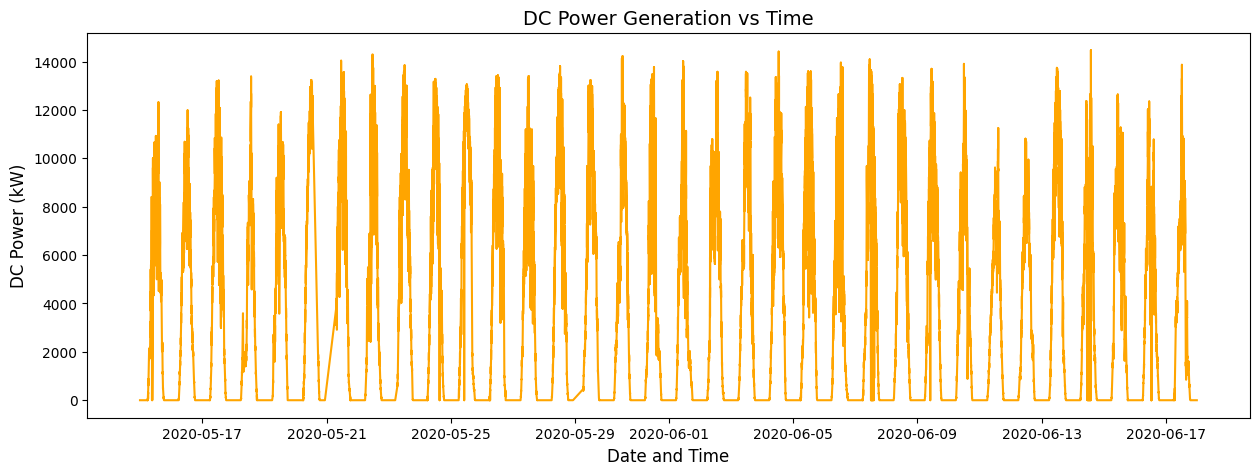

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(df['DATE_TIME'], df['DC_POWER'], color='orange')
plt.title('DC Power Generation vs Time', fontsize=14)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('DC Power (kW)', fontsize=12)
plt.show()

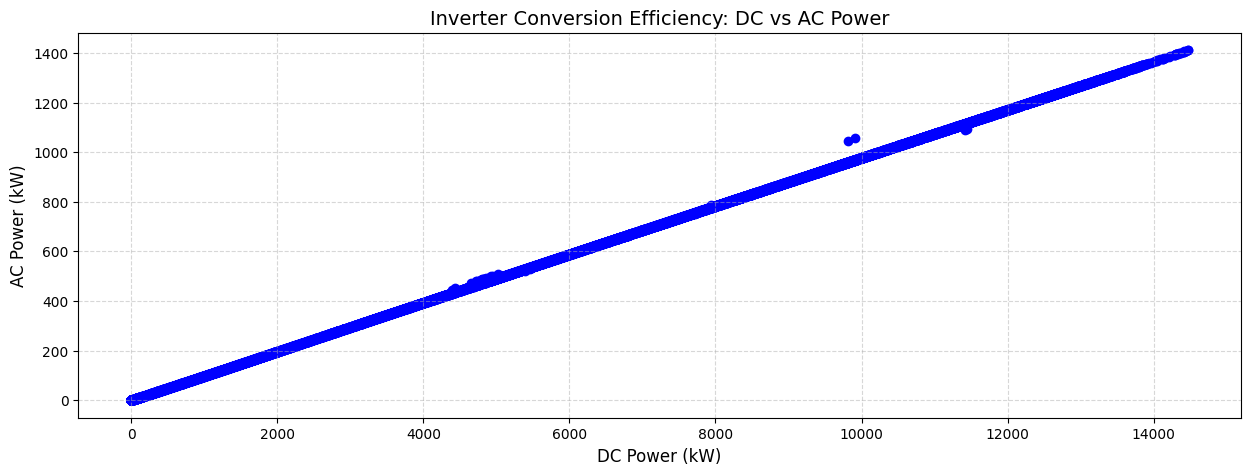

In [14]:
plt.figure(figsize=(15, 5))

plt.scatter(df['DC_POWER'], df['AC_POWER'], color='blue')

plt.title('Inverter Conversion Efficiency: DC vs AC Power', fontsize=14)
plt.xlabel('DC Power (kW)', fontsize=12)
plt.ylabel('AC Power (kW)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

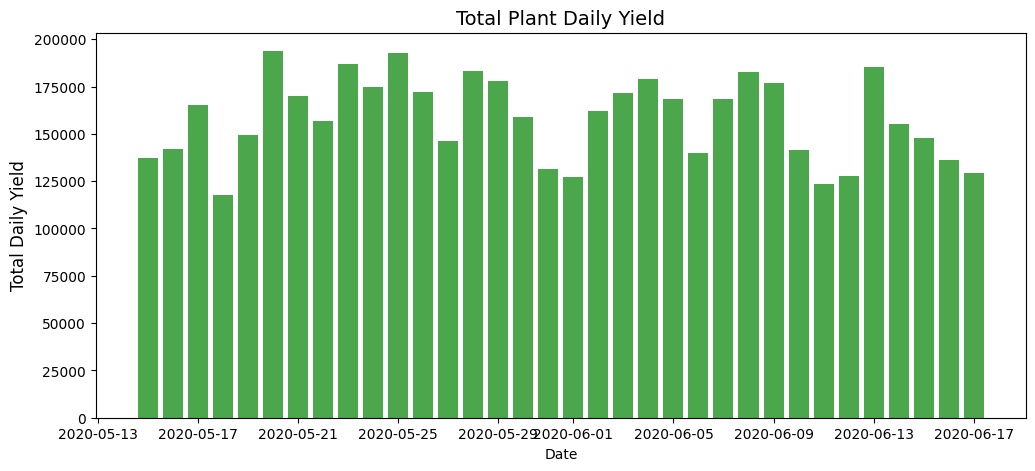

In [15]:
df['DATE'] = df['DATE_TIME'].dt.date
daily_plant_yield = df.groupby(['DATE', 'SOURCE_KEY'])['DAILY_YIELD'].max().groupby('DATE').sum()
plt.figure(figsize=(12, 5))
plt.bar(daily_plant_yield.index, daily_plant_yield.values, color='green', alpha=0.7)
plt.title('Total Plant Daily Yield', fontsize=14)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Total Daily Yield', fontsize=12)
plt.show()

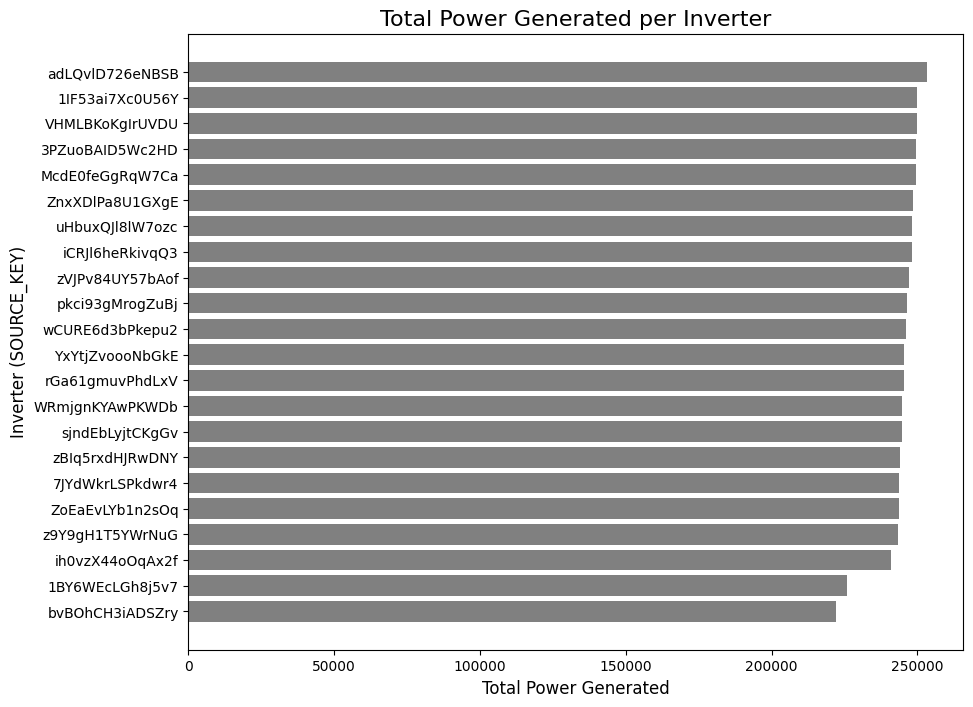

In [17]:
total_power_per_inverter = df.groupby('SOURCE_KEY')['TOTAL_YIELD'].max() - df.groupby('SOURCE_KEY')['TOTAL_YIELD'].min()
total_power_per_inverter = total_power_per_inverter.sort_values(ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(total_power_per_inverter.index, total_power_per_inverter.values, color='gray')
plt.title('Total Power Generated per Inverter', fontsize=16)
plt.ylabel('Inverter (SOURCE_KEY)', fontsize=12)
plt.xlabel('Total Power Generated', fontsize=12)
plt.show()